# Exploring Corpora (more details with plot)

In this assignment, I will perform text normalization, using Regular Expression, then explore corpora.

The corpora are in Arabic language, and I want to find count of some words, and change in counts according to different years.

The text normalization includes

1.   علامات الترقيم
2.   الحركات
3. التنوين

## Search is allowed for single word or sentance of many words

## Functions

In [0]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd

def load_lined_corpus(file_name):
    base_url = "url or drive path/"
    text = open(base_url+file_name, encoding='utf-8').read().split('\n')
    return text

def words_count(text):
    text = text.split()
    word_counts = {}
    for word in text:
        word_counts[word] = word_counts.get(word, 0) + 1
    return list(word_counts.items())

def word_regex(term):
    return '["\',-\\/:،؛ًٌٍَُِّ]?' + term + '["\',-\\/:،؛ًٌٍَُِّ]?'

def detect_year_from_date(date):
    dt = datetime.strptime(date, '%Y-%m-%d')
    return dt.year

def struct_dict_of_years(text):
    date_regex = '([0-9]{4}-[0-9]{2}-[0-9]{2})$' # the date of title is at end of statement
    dictionaty = {}
    
    for line in text:
        date_result = re.search(date_regex, line)
        if date_result is not None:
            date = re.search(date_regex, line)[0]
            year = detect_year_from_date(date)
            dictionaty[year] = list()
        
    return dictionaty

def struct_title_date_dict(text, year):
    date_regex = '([0-9]{4}-[0-9]{2}-[0-9]{2})$' # the date of title is at end of statement
    titles = list()
    
    for line in text:
        date_result = re.search(date_regex, line)
        if date_result is not None:
            date = re.search(date_regex, line)[0]
            statement = re.sub(date, '', line).strip()
            
            title_year = detect_year_from_date(date)
            if title_year == year:
                titles.append(statement)
    
    return titles

def word_count(word, list_of_year):
    whole_text = ' '.join(list_of_year)
    return len(re.findall(word_regex(word), whole_text))

# if you use Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Files

In [0]:
# Files
jsc = load_lined_corpus("aljazeera.net_20190419_date_titles.txt")
cnn = load_lined_corpus("arabic.cnn.com_20190419_date_titles.txt")
euro  = load_lined_corpus("arabic.euronews.com_20190409_date_titles.txt")
rt = load_lined_corpus("arabic.rt.com_20190419_date_titles.txt")
bbc = load_lined_corpus("bbc.com_20190409_date_titles.txt")

## Dictionary of Years

for jsc (as example)

In [0]:
jsc_years_dict = struct_dict_of_years(jsc)
jsc_dict = {}
for year in jsc_years_dict.keys():
    jsc_dict[year] = struct_title_date_dict(jsc, year)

for rt

In [0]:
rt_years_dict = struct_dict_of_years(rt)
rt_dict = {}
for year in rt_years_dict.keys():
    jsc_dict[year] = struct_title_date_dict(rt, year)

for euro

In [0]:
euro_years_dict = struct_dict_of_years(euro)
euro_dict = {}
for year in euro_years_dict.keys():
    euro_dict[year] = struct_title_date_dict(euro, year)

for bbc

In [0]:
bbc_years_dict = struct_dict_of_years(bbc)
bbc_dict = {}
for year in bbc_years_dict.keys():
    bbc_dict[year] = struct_title_date_dict(bbc, year)

for cnn

In [0]:
cnn_years_dict = struct_dict_of_years(cnn)
cnn_dict = {}
for year in cnn_years_dict.keys():
    cnn_dict[year] = struct_title_date_dict(cnn, year)

## Plotting

### Example 1 - One word
#### word: "قطر"
#### in: jsc

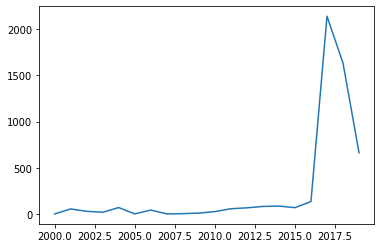

In [0]:
# Plotting
search_key = 'قطر'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

-------------------------------------------------------------------

### Example 2 - Sentance of many words
#### word: "بشار الأسد"
#### in: cnn

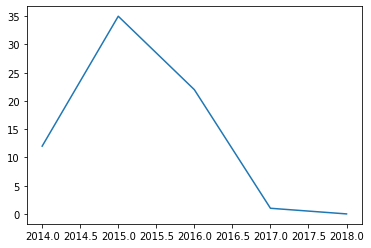

In [0]:
# Plotting 'بشار الأسد' in cnn
search_key = 'بشار الأسد'
bins = list(cnn_dict.keys());
data = dict()
for key in cnn_dict.keys():
    data[key] = word_count(search_key, cnn_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

-------------------------------------------------------------------

### Example 3 - 
#### word: "ديمقراطية"
#### in: euro

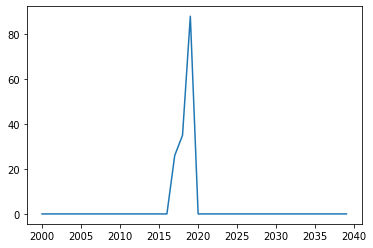

In [0]:
# Plotting 'ديمقراطية' in euro
search_key = 'ديمقراطية'
bins = list(euro_dict.keys());
data = dict()
for key in euro_dict.keys():
    data[key] = word_count(search_key, euro_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

-------------------------------------------------------------------

### Example 3 - 
#### word: "ديمقراطية"
#### in: jsc

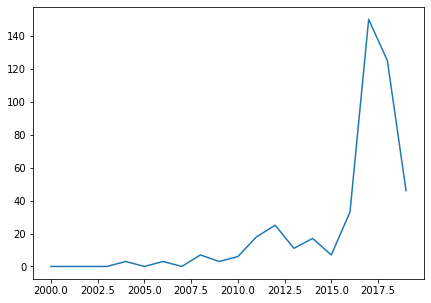

In [0]:
# Plotting 'ديمقراطية' in jsc
search_key = 'ديمقراطية'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

---------------------------------------------------------------------

### Example 4 - 
#### word: "غزة"
#### in: jsc

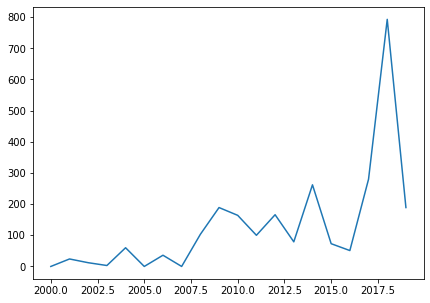

In [0]:
search_key = 'غزة'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

-----------------------------------------------

### Example 5 - 
#### word: "حقوق الإنسان"
#### in: bbc

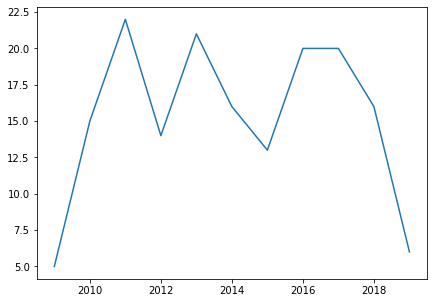

In [0]:
search_key = 'حقوق الإنسان'
bins = list(bbc_dict.keys());
data = dict()
for key in bbc_dict.keys():
    data[key] = word_count(search_key, bbc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

------------------------------------------------------------

### Example 6 - 
#### word: "حقوق الإنسان"
#### in: euro

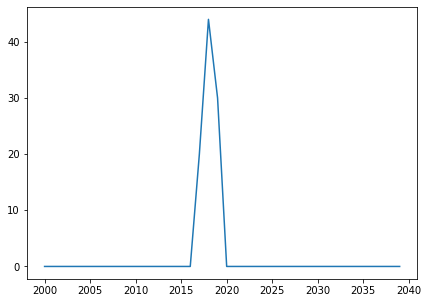

In [0]:
search_key = 'حقوق الإنسان'
bins = list(euro_dict.keys());
data = dict()
for key in euro_dict.keys():
    data[key] = word_count(search_key, euro_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

--------------------------------------------------------------------

### Example 7 - 
#### word: "إرهاب"
#### in: euro

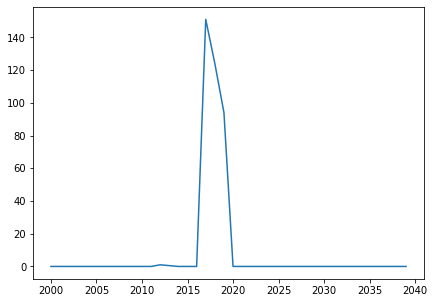

In [0]:
search_key = 'إرهاب'
bins = list(euro_dict.keys());
data = dict()
for key in euro_dict.keys():
    data[key] = word_count(search_key, euro_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

--------------------------------------------------------------

### Example 8 - 
#### word: "إرهاب"
#### in: bbc

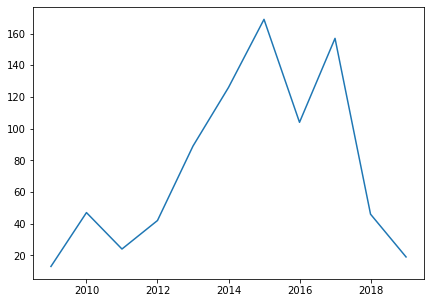

In [0]:
search_key = 'إرهاب'
bins = list(bbc_dict.keys());
data = dict()
for key in bbc_dict.keys():
    data[key] = word_count(search_key, bbc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

---------------------------------------------------------------------

### Example 9 - 
#### word: "إرهاب"
#### in: jsc

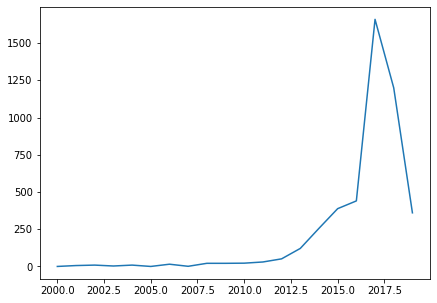

In [0]:
search_key = 'إرهاب'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

-------------------------------------------

### Example 10 - 
#### word: "حوثي"
#### in: jsc
##### incluing "حوثيين", "الحوثي", "الحوثيون", "الحوثيين"

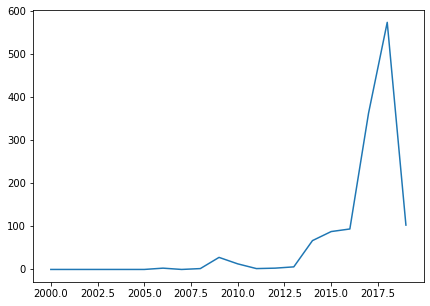

In [0]:
search_key = 'حوثي'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

---------------------------------------

### Example 11 - 
#### word: "حوثي"
#### in: jsc
##### incluing "حوثيين", "الحوثي", "الحوثيون", "الحوثيين"

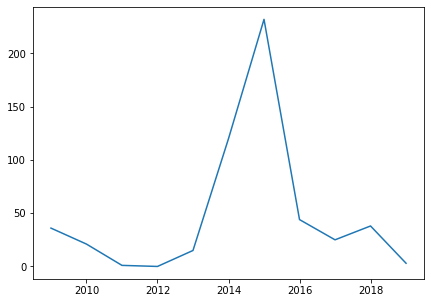

In [0]:
search_key = 'حوثي'
bins = list(bbc_dict.keys());
data = dict()
for key in bbc_dict.keys():
    data[key] = word_count(search_key, bbc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

---------------------------------------------

### Example 12 - 
#### word: "حرب"
#### in: jsc

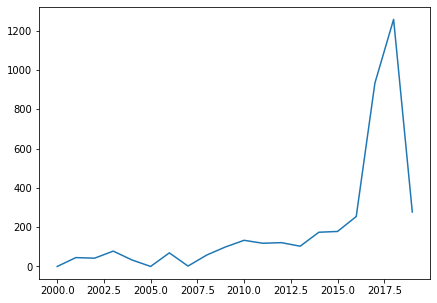

In [0]:
search_key = 'حرب'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

---------------------------------------------------

### Example 13 - 
#### word: "حرب"
#### in: bbc

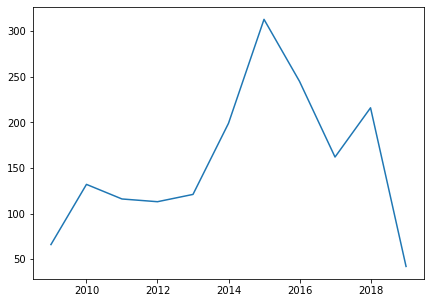

In [0]:
search_key = 'حرب'
bins = list(bbc_dict.keys());
data = dict()
for key in bbc_dict.keys():
    data[key] = word_count(search_key, bbc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

-----------------------------------------------

### Example 14 - 
#### word: "أردوغان"
#### in: bbc

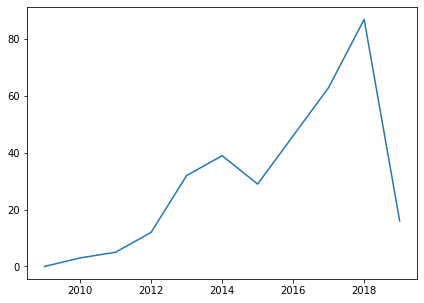

In [0]:
search_key = 'أردوغان'
bins = list(bbc_dict.keys());
data = dict()
for key in bbc_dict.keys():
    data[key] = word_count(search_key, bbc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

------------------------------------------

### Example 15 - 
#### word: "أردوغان"
#### in: jsc

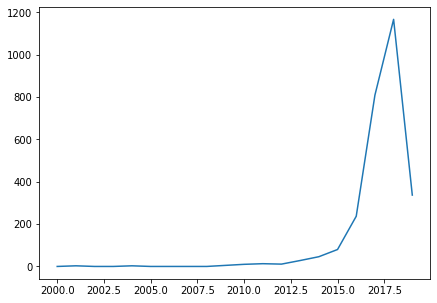

In [0]:
search_key = 'أردوغان'
bins = list(jsc_dict.keys());
data = dict()
for key in jsc_dict.keys():
    data[key] = word_count(search_key, jsc_dict[key])
lists = sorted(data.items())
x, y = zip(*lists)
plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

--------------------------------------------------------------------

# Final Results and Conclusions

1. JSC much focus on "قطر" and "أردوغان"
2. JSC brisk in 2016
3. EURO brisk in 2015-2016
4. "بشار الأسد" in CNN has most frequent in 2015, then it fell sharply
5. "ديمقراطية" in EURO has most frequent in 2018-2019
6. "ديمقراطية" in JSC has most frequent in 2016-2017
7. "غزة" in JSC has most frequent in 2017, and there was focus in 2007-2010
8. BBC focus on "حقوق الإنسان" in 2011-2013, then it fell sharply
9. "إرهاب" in BBC has most frequent in 2014, synchronize with widespread of ISIS
10. "إرهاب" in JSC has most frequent in 2017
11. "حرب" in JSC has most frequent in 2017
12. "حوثي" in JSC has most frequent in 2017
13. "حرب" in BBC has most frequent in 2015, and there was much focus in 2018 another time
14. "أردوغان" in JSC has most frequent in 2017

